# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Loading and Initial Inspection

In [2]:
file_path = 'Customer_data.csv'
df = pd.read_csv(file_path)

## Basic Info

In [3]:
print("Dataset Overview:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerAccount         328 non-null    object
 1   OrganizationName        328 non-null    object
 2   CustomerGroupId         328 non-null    object
 3   SalesCurrencyCode       328 non-null    object
 4   PaymentTerms            267 non-null    object
 5   CreditLimit             328 non-null    int64 
 6   PaymentUseCashDiscount  328 non-null    object
 7   TaxExemptNumber         19 non-null     object
 8   IsOneTimeCustomer       328 non-null    object
 9   SalesTaxGroup           206 non-null    object
 10  WarehouseId             39 non-null     object
 11  DeliveryAddressCity     68 non-null     object
 12  DeliveryAddressState    67 non-null     object
 13  DeliveryAddressZipCode  68 non-null     object
 14  PrimaryContactEmail     30 non-null    

## Displaying first few rows

In [4]:
df.head()

,CustomerAccount,OrganizationName,CustomerGroupId,SalesCurrencyCode,PaymentTerms,CreditLimit,PaymentUseCashDiscount,TaxExemptNumber,IsOneTimeCustomer,SalesTaxGroup,WarehouseId,DeliveryAddressCity,DeliveryAddressState,DeliveryAddressZipCode,PrimaryContactEmail,PrimaryContactPhone
0,US_SI_0002,Active Transport Inc.,20,USD,Net30,0,Normal,NaN,No,WA,NaN,NaN,NaN,NaN,NaN,NaN
1,US_SI_0003,Alpine Ski House,20,USD,Net30,0,Normal,NaN,No,WA,NaN,NaN,NaN,NaN,NaN,NaN
2,US_SI_0062,Brakes and Gears,20,USD,Net30,0,Normal,NaN,No,UT,NaN,NaN,NaN,NaN,NaN,NaN
3,US_SI_0063,Catalog Store,20,USD,Net30,0,Normal,NaN,No,MI,NaN,NaN,NaN,NaN,NaN,NaN
4,US_SI_0064,Central Discount Store,20,USD,Net30,0,Normal,NaN,No,WA,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping non-relevant columns (e.g., IDs, names)

In [5]:
df.drop(columns=['CustomerAccount', 'OrganizationName'], inplace=True)

# Data Cleaning and Handling Missing Values

## Impute numeric columns with the median and categorical columns with the most frequent value

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

## Imputing missing values

In [7]:
imputer_numeric = SimpleImputer(strategy='median')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

print("\nAfter Imputation Missing Values:\n", df.isnull().sum())


After Imputation Missing Values:
 CustomerGroupId           0
SalesCurrencyCode         0
PaymentTerms              0
CreditLimit               0
PaymentUseCashDiscount    0
TaxExemptNumber           0
IsOneTimeCustomer         0
SalesTaxGroup             0
WarehouseId               0
DeliveryAddressCity       0
DeliveryAddressState      0
DeliveryAddressZipCode    0
PrimaryContactEmail       0
PrimaryContactPhone       0
dtype: int64


# Exploratory Data Analysis (EDA)

## Histogram for numeric columns

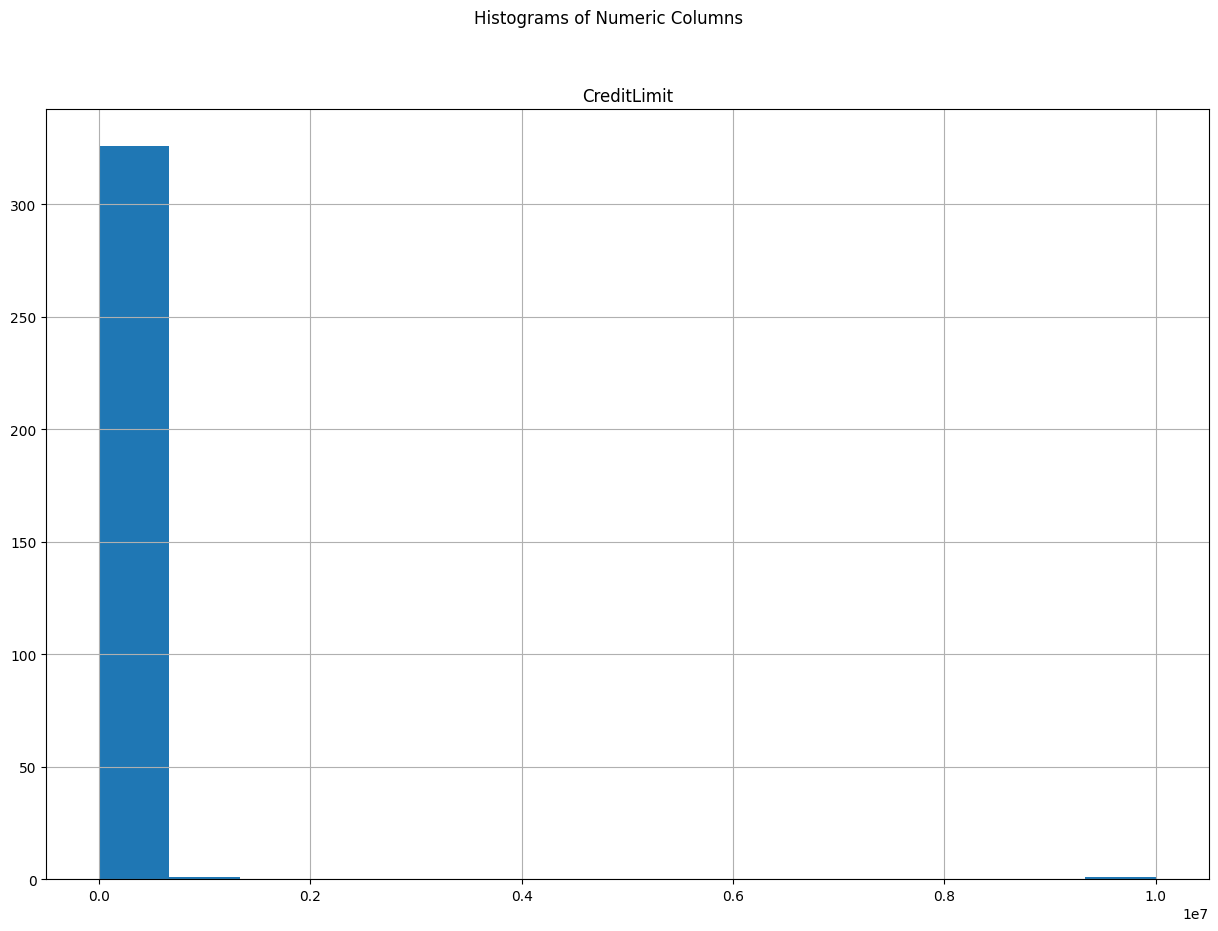

In [8]:
df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

## Boxplot for detecting outliers in numeric columns

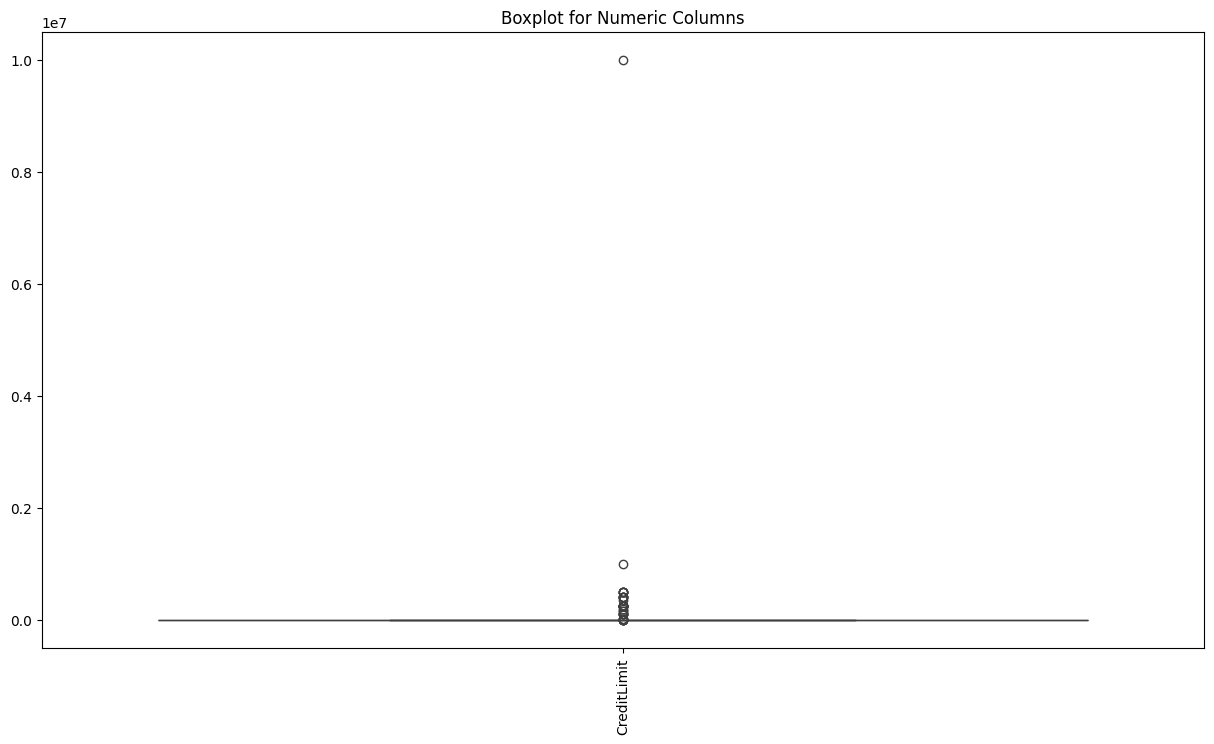

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=90)
plt.show()

## Visualizing correlations between numeric variables

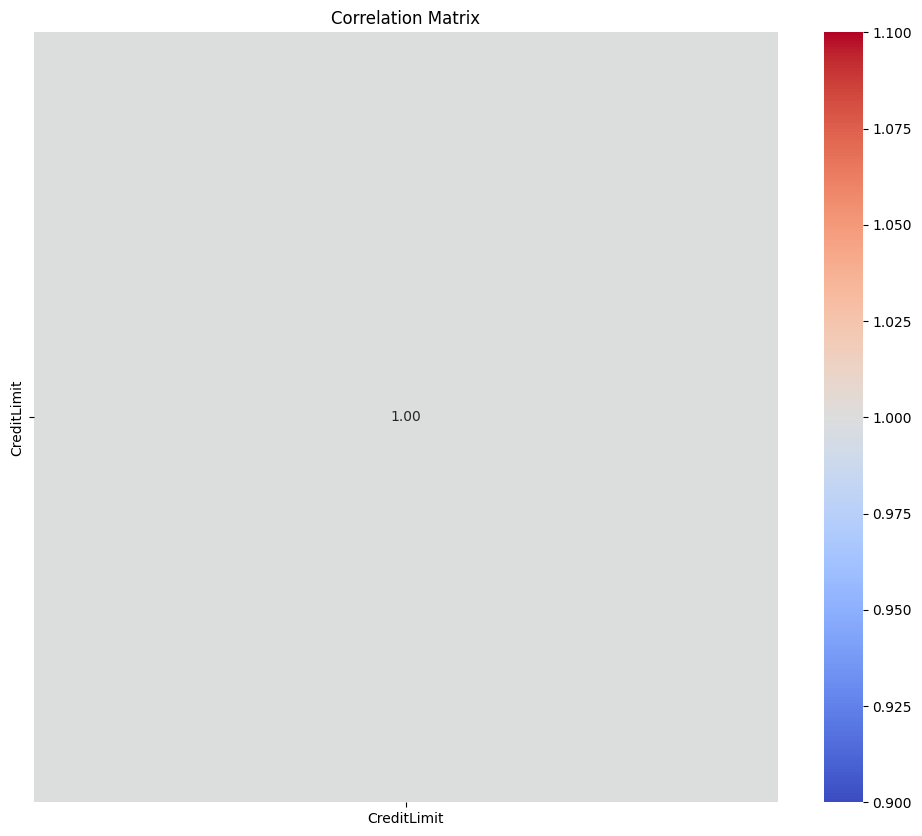

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering and Data Transformation

## Encoding categorical variables and scaling numeric data

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

## Remove the target variable from feature lists

In [12]:
numeric_cols.remove('CreditLimit')

## Creating a binary classification for CreditLimit

### Median-based classification

In [13]:
credit_limit_median = df['CreditLimit'].median()
df['CreditLimitCategory'] = df['CreditLimit'].apply(lambda x: 'High' if x > credit_limit_median else 'Low')

### Transformations

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Handling unknown categories
    ])

# Model Building (Logistic Regression)

## Defining features and target

In [15]:
X = df.drop(['CreditLimit', 'CreditLimitCategory'], axis=1)
y = df['CreditLimitCategory'].map({'High': 1, 'Low': 0})  # Converting to binary (1 for High, 0 for Low)

## Splitting data into train and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating a pipeline with preprocessing and logistic regression

In [17]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## Fitting model

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(), []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CustomerGroupId',
                                                   'SalesCurrencyCode',
                                                   'PaymentTerms',
                                                   'PaymentUseCashDiscount',
                                                   'TaxExemptNumber',
                                                   'IsOneTimeCustomer',
                                                   'SalesTaxGroup',
                                                   'WarehouseId',
                                                   'DeliveryAddressCity',
                                                   'DeliveryAddressState',
                                                   'DeliveryAddressZipCode',
                                                   'PrimaryContactEmail',
                                                   'PrimaryContactPhone'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Predictions

In [19]:
y_pred = model.predict(X_test)

## Model evaluation

In [20]:
print("\nModel Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy:  0.8484848484848485

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.67      0.33      0.44        12

    accuracy                           0.85        66
   macro avg       0.77      0.65      0.68        66
weighted avg       0.83      0.85      0.83        66


Confusion Matrix:
 [[52  2]
 [ 8  4]]
